In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
dataset =pd.read_excel('Medical.xlsx')
dataset=dataset['Accidents']
dataset=np.array(dataset).reshape(-1,1)
dataset

array([[14],
       [13],
       [17],
       [ 4],
       [16],
       [13],
       [13],
       [10],
       [19],
       [ 8],
       [14],
       [ 8],
       [15],
       [17],
       [10],
       [16],
       [23],
       [18],
       [12],
       [14],
       [14],
       [15],
       [15],
       [12],
       [ 7],
       [17],
       [11],
       [ 5],
       [ 9],
       [10],
       [19],
       [18],
       [ 7],
       [10],
       [12],
       [12],
       [14],
       [13],
       [17],
       [21],
       [11],
       [ 9],
       [15],
       [10],
       [19],
       [14],
       [ 8],
       [14],
       [14],
       [13],
       [15],
       [10],
       [11],
       [11],
       [18],
       [13],
       [10],
       [18],
       [10],
       [18],
       [10],
       [ 8],
       [10],
       [12],
       [13],
       [11],
       [ 9],
       [12],
       [14],
       [17],
       [10],
       [13],
       [19],
       [ 9],
       [15],
       [15],
       [21],

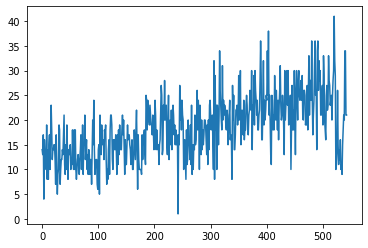

In [3]:
plt.plot(dataset)

In [4]:
# normalize the dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min()

0.0

In [5]:
# split into train and test sets
train_size = 363
test_size=181

In [6]:
train=dataset[0:train_size, :]
train.shape

(363, 1)

In [7]:
test=dataset[train_size:543, :]
test.shape

(180, 1)

In [8]:
# convert an array of values into a dataset matrix
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
look_back = 1
x_train,y_train = get_data(train, look_back)

In [10]:
x_train

array([[0.325],
       [0.3  ],
       [0.4  ],
       [0.075],
       [0.375],
       [0.3  ],
       [0.3  ],
       [0.225],
       [0.45 ],
       [0.175],
       [0.325],
       [0.175],
       [0.35 ],
       [0.4  ],
       [0.225],
       [0.375],
       [0.55 ],
       [0.425],
       [0.275],
       [0.325],
       [0.325],
       [0.35 ],
       [0.35 ],
       [0.275],
       [0.15 ],
       [0.4  ],
       [0.25 ],
       [0.1  ],
       [0.2  ],
       [0.225],
       [0.45 ],
       [0.425],
       [0.15 ],
       [0.225],
       [0.275],
       [0.275],
       [0.325],
       [0.3  ],
       [0.4  ],
       [0.5  ],
       [0.25 ],
       [0.2  ],
       [0.35 ],
       [0.225],
       [0.45 ],
       [0.325],
       [0.175],
       [0.325],
       [0.325],
       [0.3  ],
       [0.35 ],
       [0.225],
       [0.25 ],
       [0.25 ],
       [0.425],
       [0.3  ],
       [0.225],
       [0.425],
       [0.225],
       [0.425],
       [0.225],
       [0.175],
       [

In [11]:
y_train

array([0.3  , 0.4  , 0.075, 0.375, 0.3  , 0.3  , 0.225, 0.45 , 0.175,
       0.325, 0.175, 0.35 , 0.4  , 0.225, 0.375, 0.55 , 0.425, 0.275,
       0.325, 0.325, 0.35 , 0.35 , 0.275, 0.15 , 0.4  , 0.25 , 0.1  ,
       0.2  , 0.225, 0.45 , 0.425, 0.15 , 0.225, 0.275, 0.275, 0.325,
       0.3  , 0.4  , 0.5  , 0.25 , 0.2  , 0.35 , 0.225, 0.45 , 0.325,
       0.175, 0.325, 0.325, 0.3  , 0.35 , 0.225, 0.25 , 0.25 , 0.425,
       0.3  , 0.225, 0.425, 0.225, 0.425, 0.225, 0.175, 0.225, 0.275,
       0.3  , 0.25 , 0.2  , 0.275, 0.325, 0.4  , 0.225, 0.3  , 0.45 ,
       0.2  , 0.35 , 0.35 , 0.5  , 0.275, 0.325, 0.375, 0.225, 0.3  ,
       0.2  , 0.325, 0.3  , 0.2  , 0.275, 0.275, 0.15 , 0.3  , 0.475,
       0.35 , 0.575, 0.325, 0.2  , 0.25 , 0.275, 0.275, 0.15 , 0.125,
       0.325, 0.35 , 0.1  , 0.5  , 0.325, 0.3  , 0.45 , 0.375, 0.35 ,
       0.375, 0.275, 0.425, 0.4  , 0.45 , 0.275, 0.15 , 0.225, 0.175,
       0.325, 0.375, 0.2  , 0.425, 0.5  , 0.5  , 0.45 , 0.275, 0.225,
       0.375, 0.325,

In [12]:
x_test,y_test=get_data(test, look_back)

In [13]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [14]:
x_train.shape

(361, 1, 1)

In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, epochs=1000,batch_size=30)

Epoch 1/1000
361/361 [==============================] - 2s 6ms/step - loss: 0.1281
Epoch 2/1000
361/361 [==============================] - 0s 418us/step - loss: 0.1090
Epoch 3/1000
361/361 [==============================] - 0s 372us/step - loss: 0.0920
Epoch 4/1000
361/361 [==============================] - 0s 322us/step - loss: 0.0767
Epoch 5/1000
361/361 [==============================] - 0s 584us/step - loss: 0.0632
Epoch 6/1000
361/361 [==============================] - 0s 150us/step - loss: 0.0519
Epoch 7/1000
361/361 [==============================] - 0s 306us/step - loss: 0.0424
Epoch 8/1000
361/361 [==============================] - 0s 237us/step - loss: 0.0346
Epoch 9/1000
361/361 [==============================] - 0s 205us/step - loss: 0.0283
Epoch 10/1000
361/361 [==============================] - 0s 137us/step - loss: 0.0239
Epoch 11/1000
361/361 [==============================] - 0s 238us/step - loss: 0.0209
Epoch 12/1000
361/361 [==============================] - 0s 173us

361/361 [==============================] - 0s 239us/step - loss: 0.0151
Epoch 97/1000
361/361 [==============================] - 0s 194us/step - loss: 0.0151
Epoch 98/1000
361/361 [==============================] - 0s 184us/step - loss: 0.0151
Epoch 99/1000
361/361 [==============================] - 0s 205us/step - loss: 0.0151
Epoch 100/1000
361/361 [==============================] - 0s 156us/step - loss: 0.0151
Epoch 101/1000
361/361 [==============================] - 0s 160us/step - loss: 0.0151
Epoch 102/1000
361/361 [==============================] - 0s 153us/step - loss: 0.0151
Epoch 103/1000
361/361 [==============================] - 0s 203us/step - loss: 0.0151
Epoch 104/1000
361/361 [==============================] - 0s 181us/step - loss: 0.0151
Epoch 105/1000
361/361 [==============================] - 0s 182us/step - loss: 0.0151
Epoch 106/1000
361/361 [==============================] - 0s 183us/step - loss: 0.0151
Epoch 107/1000
361/361 [==============================] - 0s 

361/361 [==============================] - 0s 182us/step - loss: 0.0151
Epoch 191/1000
361/361 [==============================] - 0s 198us/step - loss: 0.0151
Epoch 192/1000
361/361 [==============================] - 0s 131us/step - loss: 0.0151
Epoch 193/1000
361/361 [==============================] - 0s 157us/step - loss: 0.0152
Epoch 194/1000
361/361 [==============================] - 0s 146us/step - loss: 0.0151
Epoch 195/1000
361/361 [==============================] - 0s 139us/step - loss: 0.0151
Epoch 196/1000
361/361 [==============================] - 0s 209us/step - loss: 0.0151
Epoch 197/1000
361/361 [==============================] - 0s 193us/step - loss: 0.0151
Epoch 198/1000
361/361 [==============================] - 0s 203us/step - loss: 0.0151
Epoch 199/1000
361/361 [==============================] - 0s 157us/step - loss: 0.0151
Epoch 200/1000
361/361 [==============================] - 0s 167us/step - loss: 0.0151
Epoch 201/1000
361/361 [==============================] - 

361/361 [==============================] - 0s 244us/step - loss: 0.0151
Epoch 285/1000
361/361 [==============================] - 0s 160us/step - loss: 0.0151
Epoch 286/1000
361/361 [==============================] - 0s 140us/step - loss: 0.0152
Epoch 287/1000
361/361 [==============================] - 0s 228us/step - loss: 0.0151
Epoch 288/1000
361/361 [==============================] - 0s 186us/step - loss: 0.0151
Epoch 289/1000
361/361 [==============================] - 0s 193us/step - loss: 0.0151
Epoch 290/1000
361/361 [==============================] - 0s 233us/step - loss: 0.0151
Epoch 291/1000
361/361 [==============================] - 0s 170us/step - loss: 0.0152
Epoch 292/1000
361/361 [==============================] - 0s 233us/step - loss: 0.0154
Epoch 293/1000
361/361 [==============================] - 0s 247us/step - loss: 0.0153
Epoch 294/1000
361/361 [==============================] - 0s 275us/step - loss: 0.0151
Epoch 295/1000
361/361 [==============================] - 

361/361 [==============================] - 0s 101us/step - loss: 0.0151
Epoch 379/1000
361/361 [==============================] - 0s 123us/step - loss: 0.0151
Epoch 380/1000
361/361 [==============================] - 0s 140us/step - loss: 0.0151
Epoch 381/1000
361/361 [==============================] - 0s 127us/step - loss: 0.0151
Epoch 382/1000
361/361 [==============================] - 0s 178us/step - loss: 0.0152
Epoch 383/1000
361/361 [==============================] - 0s 126us/step - loss: 0.0152
Epoch 384/1000
361/361 [==============================] - 0s 146us/step - loss: 0.0151
Epoch 385/1000
361/361 [==============================] - 0s 129us/step - loss: 0.0151
Epoch 386/1000
361/361 [==============================] - 0s 97us/step - loss: 0.0151
Epoch 387/1000
361/361 [==============================] - 0s 126us/step - loss: 0.0151
Epoch 388/1000
361/361 [==============================] - 0s 179us/step - loss: 0.0151
Epoch 389/1000
361/361 [==============================] - 0

361/361 [==============================] - 0s 174us/step - loss: 0.0151
Epoch 472/1000
361/361 [==============================] - 0s 131us/step - loss: 0.0151
Epoch 473/1000
361/361 [==============================] - 0s 134us/step - loss: 0.0151
Epoch 474/1000
361/361 [==============================] - 0s 132us/step - loss: 0.0155
Epoch 475/1000
361/361 [==============================] - 0s 136us/step - loss: 0.0152
Epoch 476/1000
361/361 [==============================] - 0s 174us/step - loss: 0.0151
Epoch 477/1000
361/361 [==============================] - 0s 138us/step - loss: 0.0151
Epoch 478/1000
361/361 [==============================] - 0s 113us/step - loss: 0.0151
Epoch 479/1000
361/361 [==============================] - 0s 133us/step - loss: 0.0151
Epoch 480/1000
361/361 [==============================] - 0s 134us/step - loss: 0.0151
Epoch 481/1000
361/361 [==============================] - 0s 143us/step - loss: 0.0151
Epoch 482/1000
361/361 [==============================] - 

361/361 [==============================] - 0s 130us/step - loss: 0.0151
Epoch 566/1000
361/361 [==============================] - 0s 133us/step - loss: 0.0151
Epoch 567/1000
361/361 [==============================] - 0s 250us/step - loss: 0.0151
Epoch 568/1000
361/361 [==============================] - 0s 138us/step - loss: 0.0151
Epoch 569/1000
361/361 [==============================] - 0s 179us/step - loss: 0.0151
Epoch 570/1000
361/361 [==============================] - 0s 122us/step - loss: 0.0151
Epoch 571/1000
361/361 [==============================] - 0s 169us/step - loss: 0.0152
Epoch 572/1000
361/361 [==============================] - 0s 149us/step - loss: 0.0151
Epoch 573/1000
361/361 [==============================] - 0s 136us/step - loss: 0.0151
Epoch 574/1000
361/361 [==============================] - 0s 124us/step - loss: 0.0151
Epoch 575/1000
361/361 [==============================] - 0s 143us/step - loss: 0.0151
Epoch 576/1000
361/361 [==============================] - 

361/361 [==============================] - 0s 155us/step - loss: 0.0152
Epoch 660/1000
361/361 [==============================] - 0s 158us/step - loss: 0.0152
Epoch 661/1000
361/361 [==============================] - 0s 136us/step - loss: 0.0151
Epoch 662/1000
361/361 [==============================] - 0s 146us/step - loss: 0.0151
Epoch 663/1000
361/361 [==============================] - 0s 101us/step - loss: 0.0151
Epoch 664/1000
361/361 [==============================] - 0s 104us/step - loss: 0.0151
Epoch 665/1000
361/361 [==============================] - 0s 147us/step - loss: 0.0151
Epoch 666/1000
361/361 [==============================] - 0s 143us/step - loss: 0.0151
Epoch 667/1000
361/361 [==============================] - 0s 134us/step - loss: 0.0151
Epoch 668/1000
361/361 [==============================] - 0s 131us/step - loss: 0.0151
Epoch 669/1000
361/361 [==============================] - 0s 144us/step - loss: 0.0151
Epoch 670/1000
361/361 [==============================] - 

361/361 [==============================] - 0s 209us/step - loss: 0.0151
Epoch 754/1000
361/361 [==============================] - 0s 152us/step - loss: 0.0151
Epoch 755/1000
361/361 [==============================] - 0s 185us/step - loss: 0.0151
Epoch 756/1000
361/361 [==============================] - 0s 139us/step - loss: 0.0151
Epoch 757/1000
361/361 [==============================] - 0s 159us/step - loss: 0.0151
Epoch 758/1000
361/361 [==============================] - 0s 142us/step - loss: 0.0151
Epoch 759/1000
361/361 [==============================] - 0s 116us/step - loss: 0.0151
Epoch 760/1000
361/361 [==============================] - 0s 98us/step - loss: 0.0151
Epoch 761/1000
361/361 [==============================] - 0s 132us/step - loss: 0.0151
Epoch 762/1000
361/361 [==============================] - 0s 190us/step - loss: 0.0150
Epoch 763/1000
361/361 [==============================] - 0s 137us/step - loss: 0.0151
Epoch 764/1000
361/361 [==============================] - 0

361/361 [==============================] - 0s 128us/step - loss: 0.0151
Epoch 848/1000
361/361 [==============================] - 0s 138us/step - loss: 0.0151
Epoch 849/1000
361/361 [==============================] - 0s 148us/step - loss: 0.0151
Epoch 850/1000
361/361 [==============================] - 0s 152us/step - loss: 0.0151
Epoch 851/1000
361/361 [==============================] - 0s 164us/step - loss: 0.0151
Epoch 852/1000
361/361 [==============================] - 0s 183us/step - loss: 0.0151
Epoch 853/1000
361/361 [==============================] - 0s 193us/step - loss: 0.0151
Epoch 854/1000
361/361 [==============================] - 0s 233us/step - loss: 0.0151
Epoch 855/1000
361/361 [==============================] - 0s 190us/step - loss: 0.0151
Epoch 856/1000
361/361 [==============================] - 0s 187us/step - loss: 0.0151
Epoch 857/1000
361/361 [==============================] - 0s 151us/step - loss: 0.0151
Epoch 858/1000
361/361 [==============================] - 

361/361 [==============================] - 0s 128us/step - loss: 0.0151
Epoch 942/1000
361/361 [==============================] - 0s 130us/step - loss: 0.0151
Epoch 943/1000
361/361 [==============================] - 0s 140us/step - loss: 0.0151
Epoch 944/1000
361/361 [==============================] - 0s 143us/step - loss: 0.0151
Epoch 945/1000
361/361 [==============================] - 0s 152us/step - loss: 0.0151
Epoch 946/1000
361/361 [==============================] - 0s 147us/step - loss: 0.0152
Epoch 947/1000
361/361 [==============================] - 0s 166us/step - loss: 0.0151
Epoch 948/1000
361/361 [==============================] - 0s 181us/step - loss: 0.0151
Epoch 949/1000
361/361 [==============================] - 0s 164us/step - loss: 0.0152
Epoch 950/1000
361/361 [==============================] - 0s 217us/step - loss: 0.0152
Epoch 951/1000
361/361 [==============================] - 0s 230us/step - loss: 0.0151
Epoch 952/1000
361/361 [==============================] - 

In [18]:
# make predictions
y_pred=model.predict(x_test)

In [19]:
 # invert predictions
y_pred=scaler.inverse_transform(y_pred)

In [20]:
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)

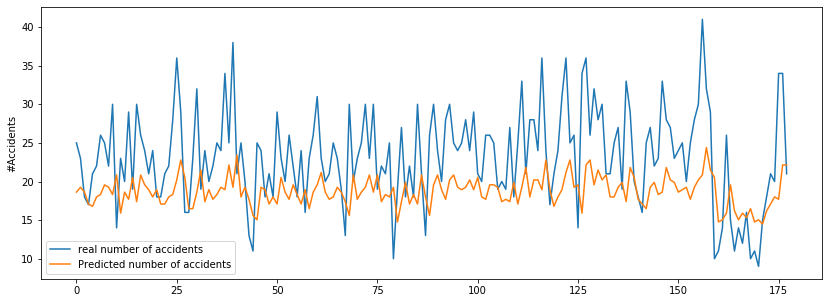

In [21]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label='real number of accidents')
plt.plot(y_pred,label='Predicted number of accidents')
plt.ylabel('#Accidents')
plt.legend()
plt.show()